## Imports

In [142]:
%pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [143]:
#Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Load dataset

In [144]:
# Loading the dataset
red_df = pd.read_csv("dataset/winequality-red.csv", sep=';')
red_df['type'] = 'red'

# create a dataframe from /dataset/winequality-white.csv
white_df = pd.read_csv("dataset/winequality-white.csv", sep=';')
white_df['type'] = 'white'

# merge the two dataframes
df = pd.concat([red_df, white_df])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [145]:
#Stats
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [146]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [147]:
# Check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

## EDA

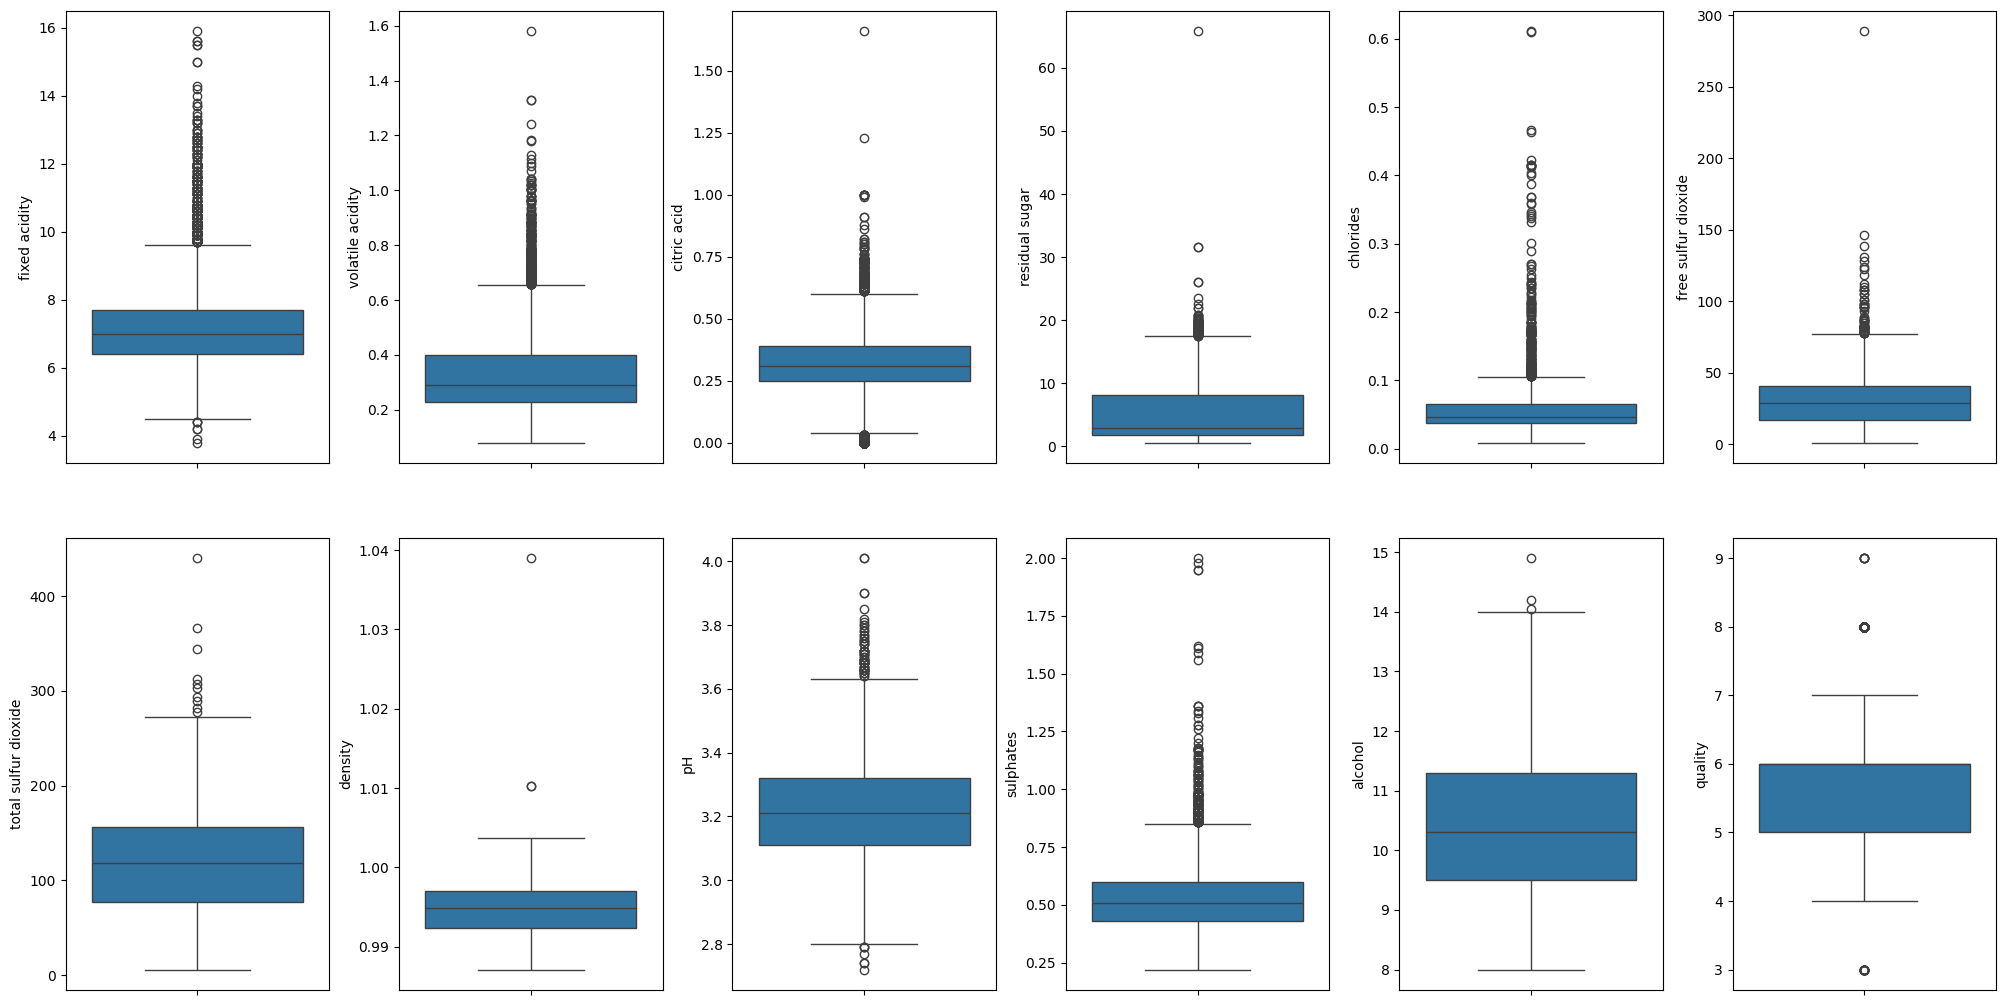

In [148]:
#Box plots
fix, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

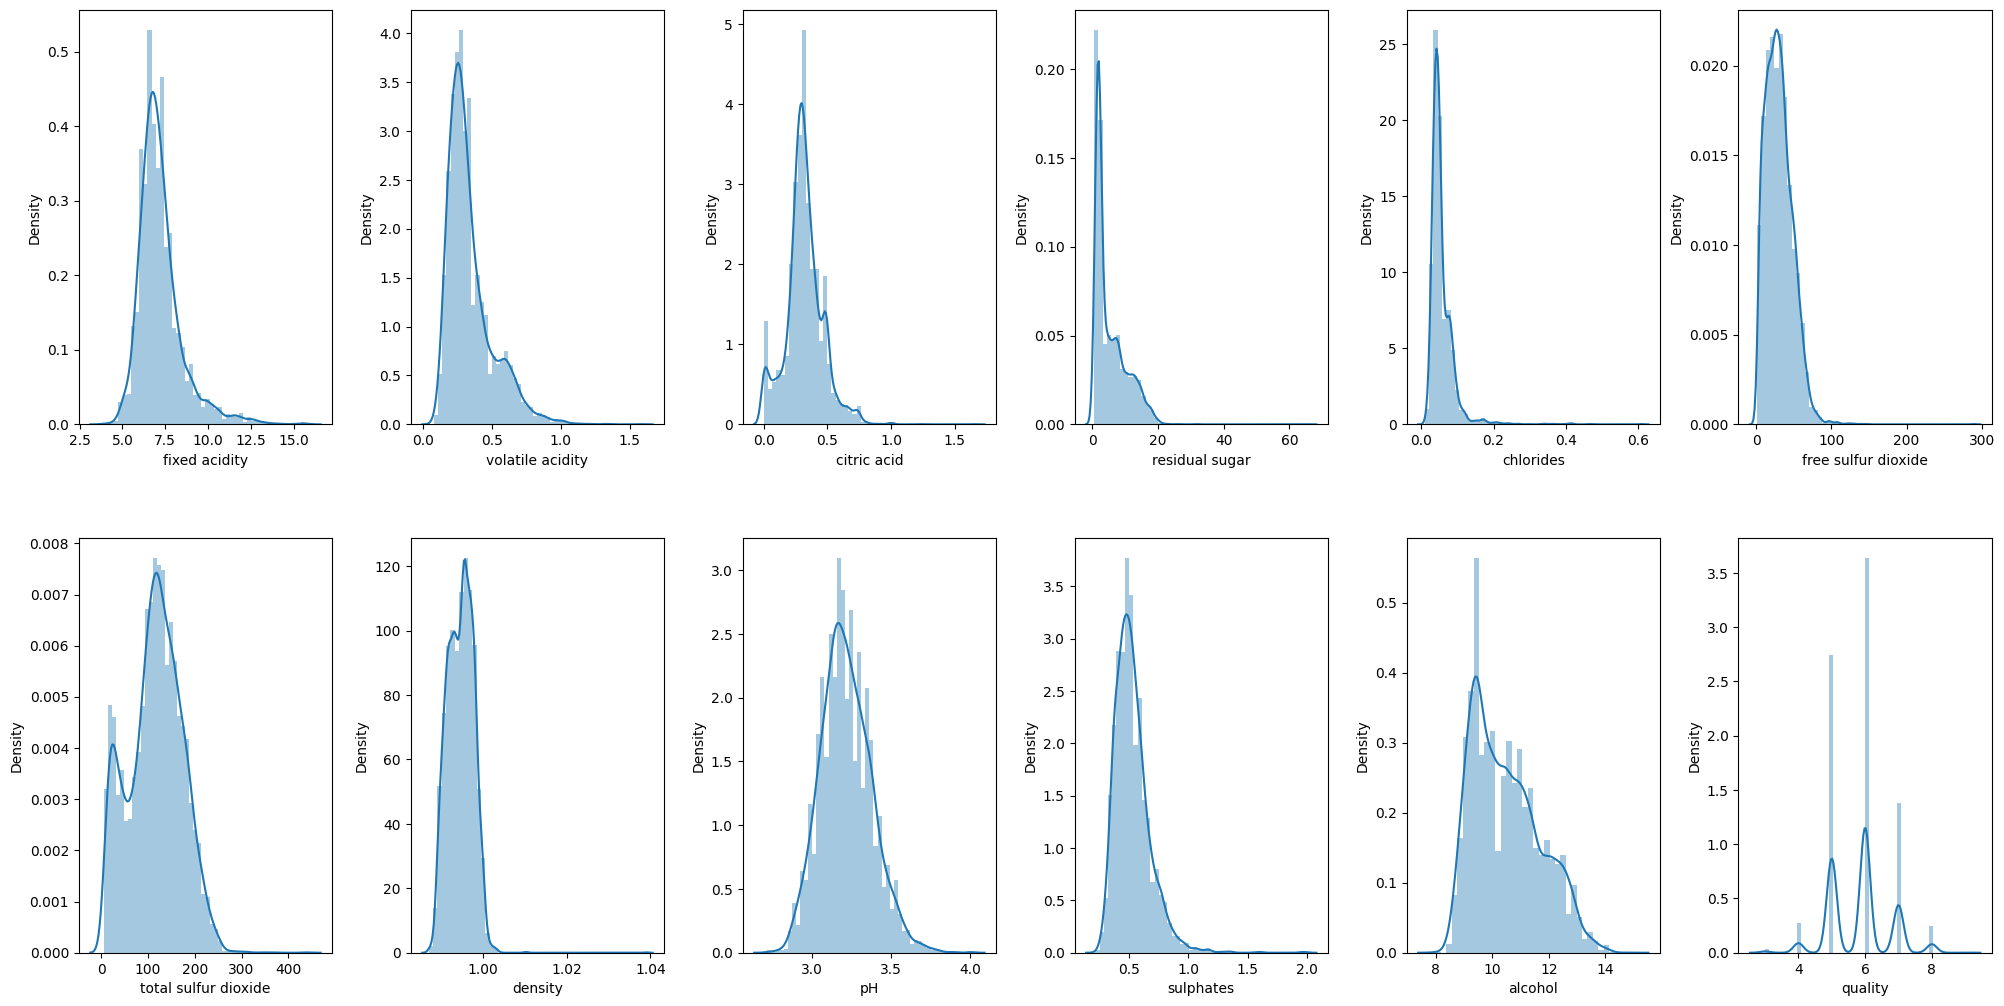

In [149]:
# Distribution plot
#Box plots
fix, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [150]:
# Log transform 
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

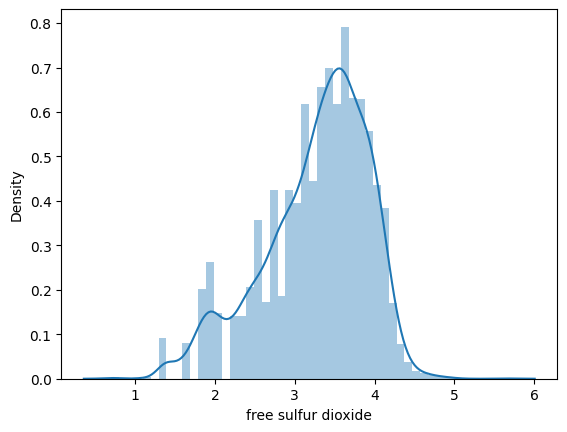

In [151]:
sns.distplot(df['free sulfur dioxide'])

<Axes: xlabel='type', ylabel='count'>

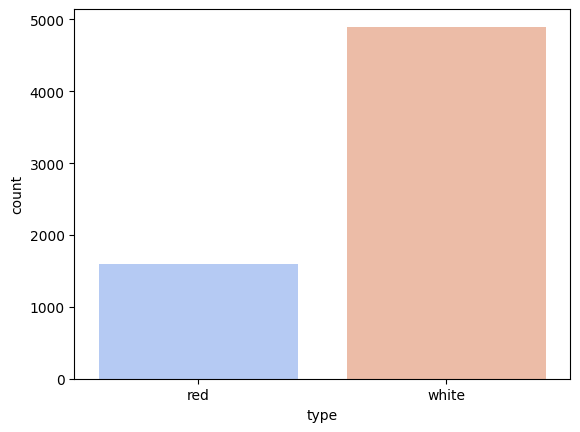

In [152]:
sns.countplot(x='type', data=df, palette='coolwarm')

<Axes: xlabel='quality', ylabel='count'>

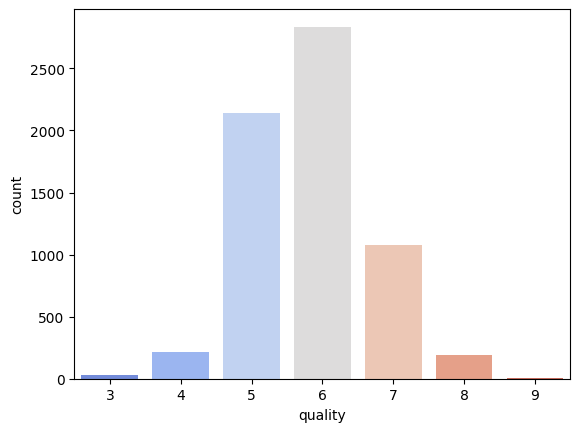

In [153]:
# plot counts of quality, with bar chart, count is y axis
sns.countplot(x='quality', data=df, palette='coolwarm')

<Axes: >

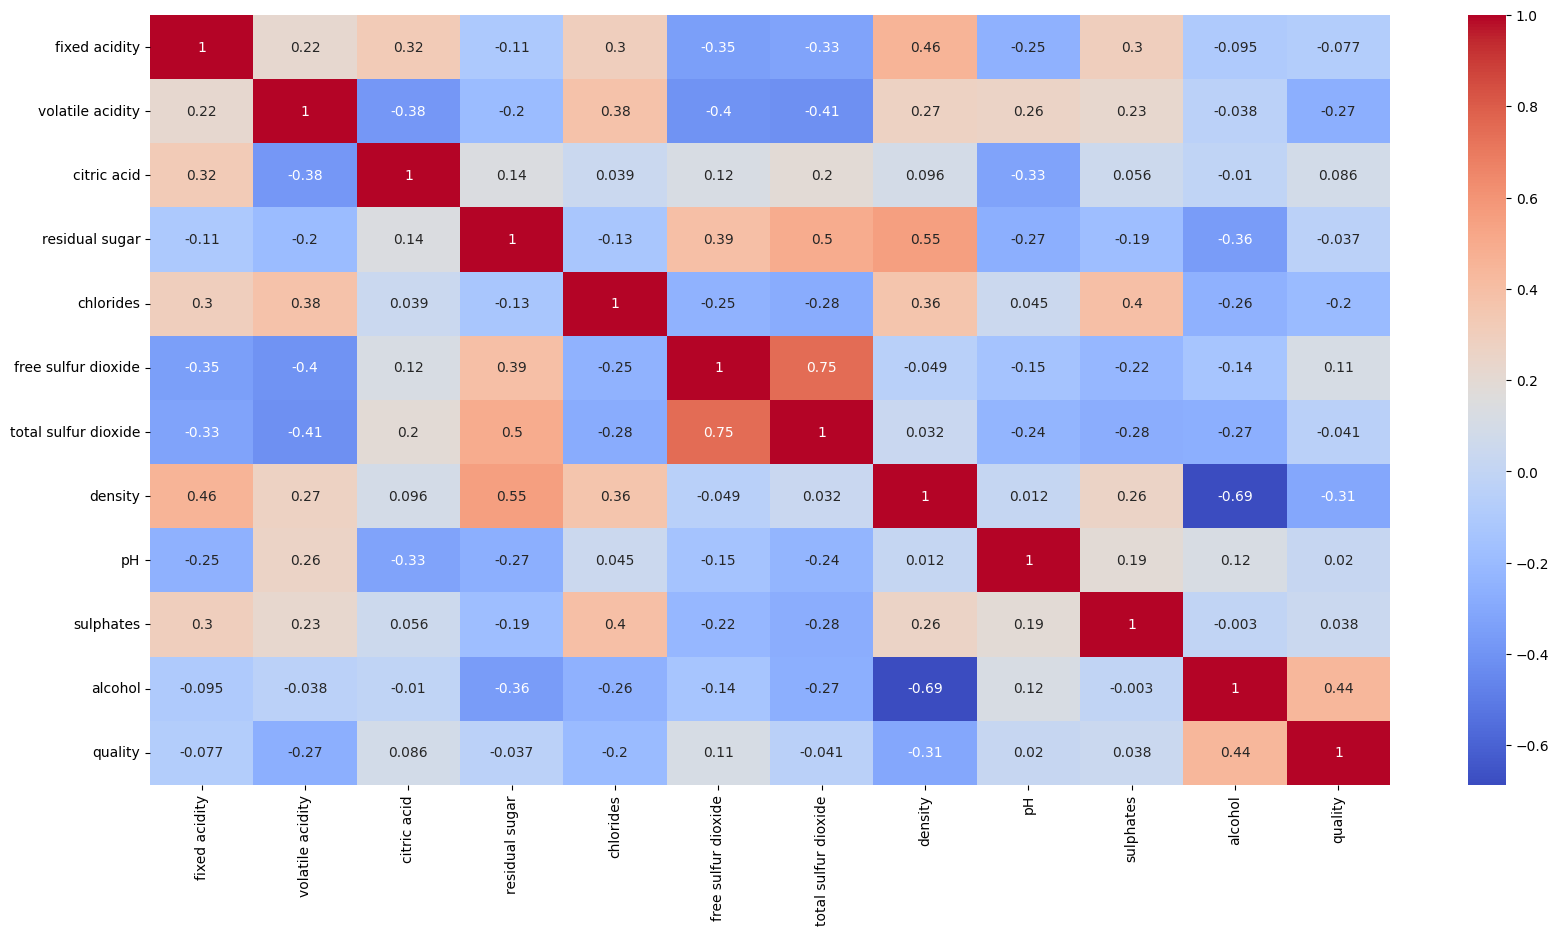

In [154]:
# skip types column, plot correlation of all other columns
no_type = df.drop('type', axis=1)
corr = no_type.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Input split

In [155]:
# free/sulfur dioxide look at the same, remove free
X = df.drop(['type', 'quality', 'density', 'free sulfur dioxide'], axis=1)
y = df['quality']

In [156]:
y.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [157]:
# Balancing input data
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

# transform dataset
X, y = oversample.fit_resample(X, y)

In [158]:
y.value_counts()

quality
5    2836
6    2836
7    2836
4    2836
8    2836
3    2836
9    2836
Name: count, dtype: int64

## Model training

In [159]:
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(X_train, y_train)
    print("Accuracy is", model.score(X_test, y_test)*100)

    # cross validation - used for better validation of model
    score = cross_val_score(model, X, y, cv=5)
    print("Cross validation is", np.mean(score)*100)

In [160]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 33.72959903284304
Cross validation is 30.97453261587314


In [161]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 79.08523070723353
Cross validation is 74.80382140797862


In [162]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 88.07173080797904
Cross validation is 82.47049547506577


In [163]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 88.71650211565584
Cross validation is 83.32177049350868


In [166]:
import xgboost as xgb
model = xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_no_labels = le.fit_transform(y)
classify(model, X, y_no_labels)

Accuracy is 87.30606488011283
Cross validation is 80.52121330527939


In [165]:
import lightgbm
model = lightgbm.LGBMClassifier()
classify(model, X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 14889, number of used features: 9
[LightGBM] [Info] Start training from score -1.952041
[LightGBM] [Info] Start training from score -1.942156
[LightGBM] [Info] Start training from score -1.947793
[LightGBM] [Info] Start training from score -1.944031
[LightGBM] [Info] Start training from score -1.949207
[LightGBM] [Info] Start training from score -1.960592
[LightGBM] [Info] Start training from score -1.925896
Accuracy is 86.17771509167842
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_col_wise=true` to rem